In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start='2010-01-01'
end='2021-12-30'

df=data.DataReader('INFY','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,6.96875,6.90625,6.94375,6.90875,5848000.0,5.184669
2010-01-04,7.11250,7.00125,7.00250,7.09500,11443200.0,5.324440
2010-01-05,7.12500,7.04875,7.08750,7.12250,8181600.0,5.345077
2010-01-06,7.07250,6.97000,7.07250,7.01375,11821600.0,5.263465
2010-01-07,6.89625,6.77750,6.88500,6.80000,20374400.0,5.103058


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-23,24.799999,24.500000,24.690001,24.730000,2488600.0,24.456669
2021-12-27,25.340000,24.860001,24.860001,25.330000,3527200.0,25.050037
2021-12-28,25.389999,25.180000,25.360001,25.299999,3405800.0,25.020369
2021-12-29,25.379999,25.139999,25.190001,25.379999,2330400.0,25.099483
2021-12-30,25.600000,25.389999,25.540001,25.410000,2293900.0,25.129152


In [4]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,6.96875,6.90625,6.94375,6.90875,5848000.0,5.184669
1,2010-01-04,7.11250,7.00125,7.00250,7.09500,11443200.0,5.324440
2,2010-01-05,7.12500,7.04875,7.08750,7.12250,8181600.0,5.345077
3,2010-01-06,7.07250,6.97000,7.07250,7.01375,11821600.0,5.263465
4,2010-01-07,6.89625,6.77750,6.88500,6.80000,20374400.0,5.103058


In [5]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,6.96875,6.90625,6.94375,6.90875,5848000.0
1,7.11250,7.00125,7.00250,7.09500,11443200.0
2,7.12500,7.04875,7.08750,7.12250,8181600.0
3,7.07250,6.97000,7.07250,7.01375,11821600.0
4,6.89625,6.77750,6.88500,6.80000,20374400.0


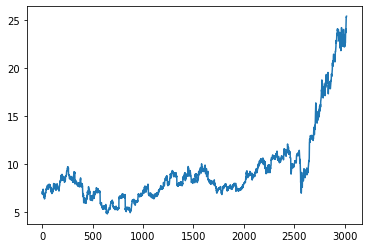

In [6]:
plt.plot(df.Close)

In [7]:
mavg100=df.Close.rolling(100).mean()
mavg100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
3016    23.1443
3017    23.1712
3018    23.1984
3019    23.2241
3020    23.2494
Name: Close, Length: 3021, dtype: float64

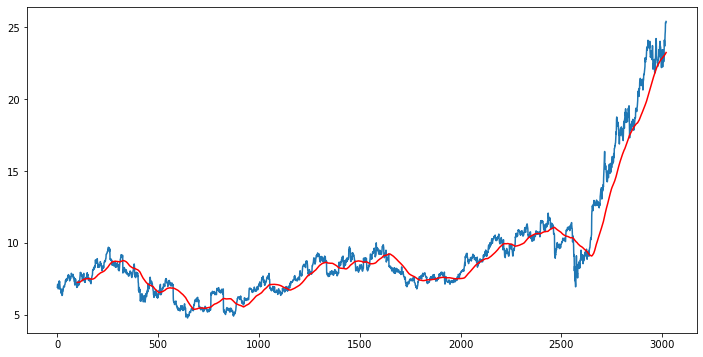

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(mavg100,'r')

In [9]:
mavg200=df.Close.rolling(200).mean()
mavg200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3016    21.36910
3017    21.40120
3018    21.43195
3019    21.46220
3020    21.49375
Name: Close, Length: 3021, dtype: float64

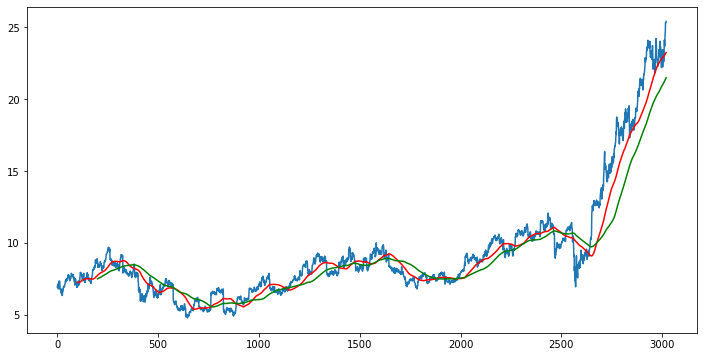

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(mavg100,'r')
plt.plot(mavg200,'g')

In [11]:
df.shape

(3021, 5)

In [12]:
# TEST - TRAIN SPLIT

data_train=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_train.shape)
print(data_test.shape)

(2114, 1)
(907, 1)


In [13]:
# SCALE DOWN DATA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [14]:
data_train_array=scaler.fit_transform(data_train)
data_train_array

array([[0.40879755],
       [0.44441787],
       [0.44967728],
       ...,
       [0.76284968],
       [0.79058088],
       [0.83169972]])

In [15]:
# CONVERT X_TRAIN & Y_TRAIN TO NUMPY ARRAYS
x_train=[]
y_train=[]
for i in range(100,data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [16]:
# ML MODEL


In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.20))

model.add(LSTM(units=60,activation='relu',return_sequences=True
              ))
model.add(Dropout(0.30))


model.add(LSTM(units=80,activation='relu',return_sequences=True
              ))
model.add(Dropout(0.40))


model.add(LSTM(units=120,activation='relu'
              ))
model.add(Dropout(0.50))


model.add(Dense(units=1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [20]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
63/63 [==============================] - 29s 218ms/step - loss: 0.0454
Epoch 2/50
63/63 [==============================] - 15s 238ms/step - loss: 0.0146
Epoch 3/50
63/63 [==============================] - 21s 333ms/step - loss: 0.0123
Epoch 4/50
63/63 [==============================] - 22s 355ms/step - loss: 0.0122
Epoch 5/50
63/63 [==============================] - 18s 288ms/step - loss: 0.0114
Epoch 6/50
63/63 [==============================] - 17s 277ms/step - loss: 0.0101
Epoch 7/50
63/63 [==============================] - 17s 269ms/step - loss: 0.0107
Epoch 8/50
63/63 [==============================] - 16s 260ms/step - loss: 0.0091
Epoch 9/50
63/63 [==============================] - 16s 253ms/step - loss: 0.0089
Epoch 10/50
63/63 [==============================] - 16s 247ms/step - loss: 0.0087
Epoch 11/50
63/63 [==============================] - 16s 246ms/step - loss: 0.0082
Epoch 12/50
63/63 [==============================] - 15s 240ms/step - loss: 0.0075
Epoch 13/50
6

In [21]:
model.save('lstm_model.h5')

In [22]:
data_test.head()

,Close
2114,9.160
2115,9.000
2116,9.070
2117,9.095
2118,9.145


In [23]:
data_train.tail()

,Close
2109,8.680
2110,8.695
2111,8.760
2112,8.905
2113,9.120


In [24]:
prev_100_days=data_train.tail(100)

In [25]:
final_df=prev_100_days.append(data_test,ignore_index=True)
final_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_4424\363535122.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=prev_100_days.append(data_test,ignore_index=True)


,Close
0,8.145
1,8.075
2,8.025
3,8.175
4,8.240


In [26]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.06524095],
       [0.06145099],
       [0.05874389],
       ...,
       [0.99404436],
       [0.99837571],
       [1.        ]])

In [27]:
input_data.shape

(1007, 1)

In [28]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
x_test,y_test=np.array(x_test),np.array(y_test)

In [29]:
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907,)


In [30]:
# PREDICTIONS

y_predicted=model.predict(x_test)
y_predicted.shape

29/29 [==============================] - 3s 62ms/step


(907, 1)

In [31]:
y_test

array([0.1201949 , 0.11153221, 0.11532213, 0.1166757 , 0.11938281,
       0.12344343, 0.12127776, 0.13156469, 0.12696263, 0.13129398,
       0.13183541, 0.13860314, 0.13373036, 0.11586356, 0.13129398,
       0.12344343, 0.11694642, 0.11586356, 0.11775851, 0.13102326,
       0.12885759, 0.13102326, 0.12939902, 0.13860314, 0.15024365,
       0.15511642, 0.15728209, 0.14780726, 0.14266377, 0.1494315 ,
       0.15971848, 0.15917705, 0.16594478, 0.14997293, 0.1548457 ,
       0.16296696, 0.15701138, 0.15782347, 0.16594478, 0.16973469,
       0.17623171, 0.1813752 , 0.18029239, 0.17487818, 0.16404982,
       0.17054684, 0.1751489 , 0.17596099, 0.18029239, 0.18164592,
       0.18191663, 0.18597726, 0.19003789, 0.18733079, 0.18787222,
       0.19003789, 0.18922579, 0.19247428, 0.19491066, 0.17920953,
       0.17893881, 0.17920953, 0.17596099, 0.17379532, 0.18029239,
       0.18327016, 0.1751489 , 0.17812667, 0.18651869, 0.18624797,
       0.1848944 , 0.18733079, 0.18868436, 0.18462373, 0.19193

In [32]:
y_predicted

array([[0.13080661],
       [0.1332942 ],
       [0.13603568],
       [0.13848633],
       [0.14041735],
       [0.14187397],
       [0.14308807],
       [0.1440463 ],
       [0.14513811],
       [0.14625198],
       [0.14736995],
       [0.14842531],
       [0.14961547],
       [0.15070985],
       [0.1507485 ],
       [0.15008955],
       [0.14891617],
       [0.14719571],
       [0.14506724],
       [0.14292027],
       [0.14166877],
       [0.14154086],
       [0.14239049],
       [0.14376386],
       [0.14564699],
       [0.14840642],
       [0.15221399],
       [0.1567432 ],
       [0.16075441],
       [0.16315083],
       [0.1640323 ],
       [0.16436538],
       [0.16474912],
       [0.16571093],
       [0.16637522],
       [0.16644189],
       [0.16638413],
       [0.16623008],
       [0.1659903 ],
       [0.16611977],
       [0.16700783],
       [0.1689586 ],
       [0.17213973],
       [0.17603368],
       [0.17938365],
       [0.18090335],
       [0.18069637],
       [0.179

In [33]:
# VALUES SCALED DOWN ARE CONVERTED TO MATCH THE DIFFERENCE BETWEEN PREDICTED AND TESTED VALUES

In [34]:
scaler.scale_

array([0.05414185])

In [35]:
scale_factor=1/0.05414185
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor


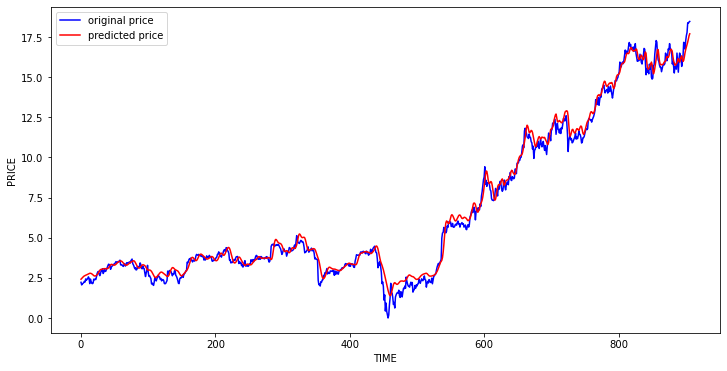

In [36]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel('TIME')
plt.ylabel('PRICE')
plt.legend()
plt.show()